# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("01_source/tabula_ch/tabula_armleuchteralgen.csv")

In [3]:
df.head()

,Wissenschaftlicher Name,Deutscher Name,Kat.,Kriterien der IUCN,Lebensraumtyp,Wassertiefe (m),Höhenstufen,Bemerkungen
0,Chara aspera Willd.,Rauhe Armleuchteralge,VU,"B1ab(iv), B2ab(iv)",NaN,"1,9 (0,1–8)",C – S,NaN
1,Chara contraria A. Braun,Gegensätzliche Armleuchteralge,LC,"B1ab(iv), B2ab(iv)",v. a. Seen,"3,6 (0,1–12)",C – A,NaN
2,Chara delicatula C. Agardh,Feine Armleuchteralge,VU,"B1ab(iv), B2ab(iv)",NaN,"3,3 (0,1–9)",C – S,NaN
3,Chara denudata A. Braun,Nackte Armleuchteralge,DD,NaN,Seen,"3,5 (0,5–7)",C – S,Unsicherer Status
4,Chara filiformis Hertzsch,Feine Armleuchteralge,DD,NaN,Seen,"3,7 (1–5)",C,Vermutlich häufiger als beobachtet


In [4]:
len (df)

25

In [5]:
df.shape

(25, 8)

In [6]:
df["Kat."].value_counts()

VU    6
EN    6
RE    4
CR    4
LC    2
DD    2
NT    1
Name: Kat., dtype: int64

In [7]:
df.pop("Kriterien der IUCN")

0     B1ab(iv), B2ab(iv)
1     B1ab(iv), B2ab(iv)
2     B1ab(iv), B2ab(iv)
3                    NaN
4                    NaN
5     B1ab(iv), B2ab(iv)
6     B1ab(iv), B2ab(iv)
7     B1ab(iv), B2ab(iv)
8           B2ab(iv), D2
9     B1ab(iv), B2ab(iv)
10          B2ab(iv), D2
11    B1ab(iv), B2ab(iv)
12    B1ab(iv), B2ab(iv)
13                   NaN
14                   NaN
15          B2ab(iv), D2
16              B2ab(iv)
17                   NaN
18          B2ab(iv), D2
19    B1ab(iv), B2ab(iv)
20              B2ab(iv)
21              B2ab(iv)
22    B1ab(iv), B2ab(iv)
23    B1ab(iv), B2ab(iv)
24                   NaN
Name: Kriterien der IUCN, dtype: object

In [8]:
df.pop("Wassertiefe (m)")

0       1,9 (0,1–8)
1      3,6 (0,1–12)
2       3,3 (0,1–9)
3       3,5 (0,5–7)
4         3,7 (1–5)
5      3,3 (0,1–12)
6      2,7 (0,1–20)
7       1,3 (0,1–4)
8      2,75 (0,2–4)
9       4,0 (0,1–7)
10                -
11      4,0 (0,2–6)
12     1,3 (0,1–20)
13                -
14                -
15              0,9
16    0,5 (0,2–1,0)
17                -
18     0,5 (0,1–10)
19     4,1 (0,1–15)
20     2,2 (0,1–10)
21                -
22     6,8 (0,6–12)
23      4,0 (0,2–6)
24                -
Name: Wassertiefe (m), dtype: object

In [9]:
df.pop("Höhenstufen")

0     C – S
1     C – A
2     C – S
3     C – S
4         C
5     C – S
6     C – S
7     C – S
8     C – M
9     C – S
10        S
11    C – S
12    C – A
13        C
14        C
15    C – S
16    C – A
17        C
18        C
19    C – A
20    C – S
21        C
22    C – M
23    C – M
24        C
Name: Höhenstufen, dtype: object

In [10]:
df.head(1)

,Wissenschaftlicher Name,Deutscher Name,Kat.,Lebensraumtyp,Bemerkungen
0,Chara aspera Willd.,Rauhe Armleuchteralge,VU,NaN,NaN


In [11]:
df.rename(columns={"Wissenschaftlicher Name":"sc name","Deutscher Name":"dt name","Kat.":"cat","Lebensraumtyp":"lebensraumtyp", "Bemerkungen":"bemerkungen"},inplace=True)

In [12]:
df.head(1)

,sc name,dt name,cat,lebensraumtyp,bemerkungen
0,Chara aspera Willd.,Rauhe Armleuchteralge,VU,NaN,NaN


In [13]:
df['einteilung'] = 'Pflanzen'
df['untergruppe'] = 'Wasserpflanzen'

In [14]:
df.head(1)

,sc name,dt name,cat,lebensraumtyp,bemerkungen,einteilung,untergruppe
0,Chara aspera Willd.,Rauhe Armleuchteralge,VU,NaN,NaN,Pflanzen,Wasserpflanzen


In [15]:
df["cat"].value_counts()

VU    6
EN    6
RE    4
CR    4
LC    2
DD    2
NT    1
Name: cat, dtype: int64

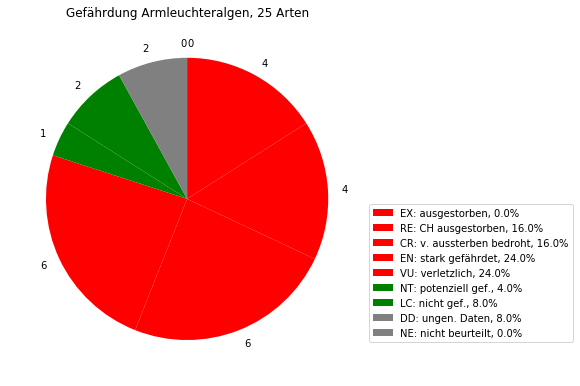

In [16]:
values = [0, 4, 4, 6, 6, 1, 2, 2, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Armleuchteralgen, 25 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

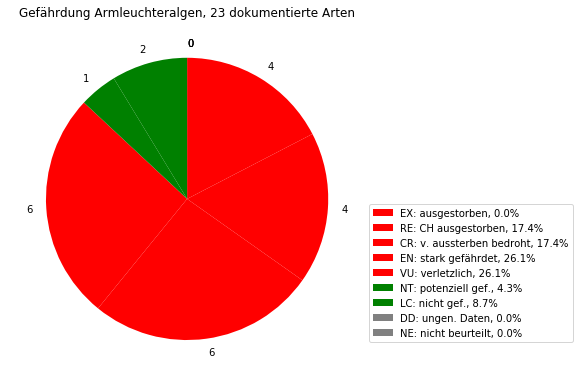

In [17]:
values = [0, 4, 4, 6, 6, 1, 2, 0, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Armleuchteralgen, 23 dokumentierte Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()